In [2]:
from sklearn import tree, model_selection, metrics
from matplotlib import pyplot as plt # for a good visualization of the trees 

In [3]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]
# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]


In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


In [5]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])


array([1, 1, 0])

In [6]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



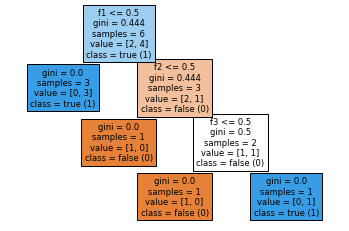

In [7]:
_=tree.plot_tree(clf,feature_names= ("f1","f2" , "f3", "f4"),class_names= ("false (0)", "true (1)" ),filled=True)


In [8]:
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [9]:
X = [[0, 0, 1, 0], [0, 1, 0, 1], [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 1]]

Y = [0, 0, 0, 1, 0, 1, 1, 1]

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [11]:
clf.predict([[1,1,0,1] , [0,1,0,0] , [1,0,0,1] ])

array([0, 0, 0])

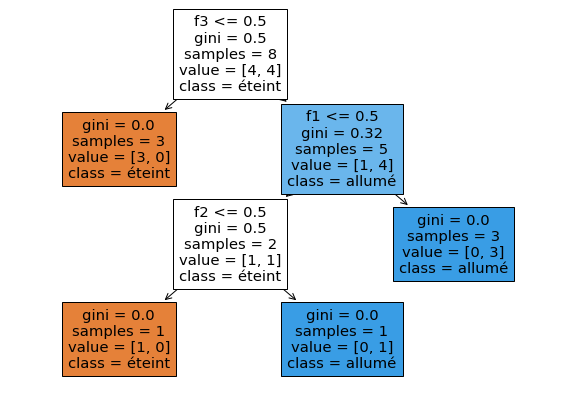

In [12]:

plt.figure(figsize=(10,7))
tree.plot_tree(clf,feature_names= ("f1","f2","f3", "f4"),class_names= ("éteint", "allumé" ),filled=True)
plt.show()

In [13]:
#What are the features?

In [14]:
#Number_of_priors, score_factor, age_above_fourty, age_below_twenty, african_american, asian, hispanic, native_american, other

In [15]:
#How many examples in the dataset?

In [16]:
#6172

What are your expectations regarding the most important features?

In [17]:
#The most important features will be: number_of_priors, age_above_fourty, age_below_twenty

In [18]:
#Propose (informally) a way to reduce the dataset

In [19]:
#Remove the people that have identical feature values

In [20]:
#There many ways to binarize the dataset. How do you propose to do so?

In [21]:
#Change Number_of_priors to Priors_above_four

In [22]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)

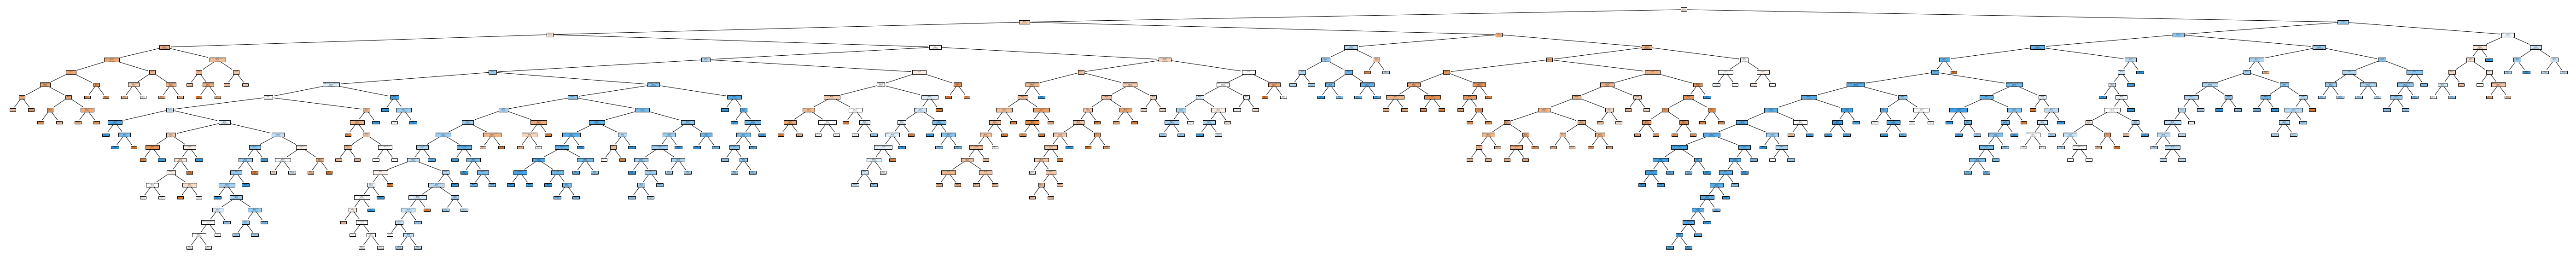

In [24]:

plt.figure(figsize=(100,10))
tree.plot_tree(clf,feature_names= tuple(features),class_names= (prediction, "NO_" + prediction ),filled=True)
plt.show()

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(train_examples, train_labels)

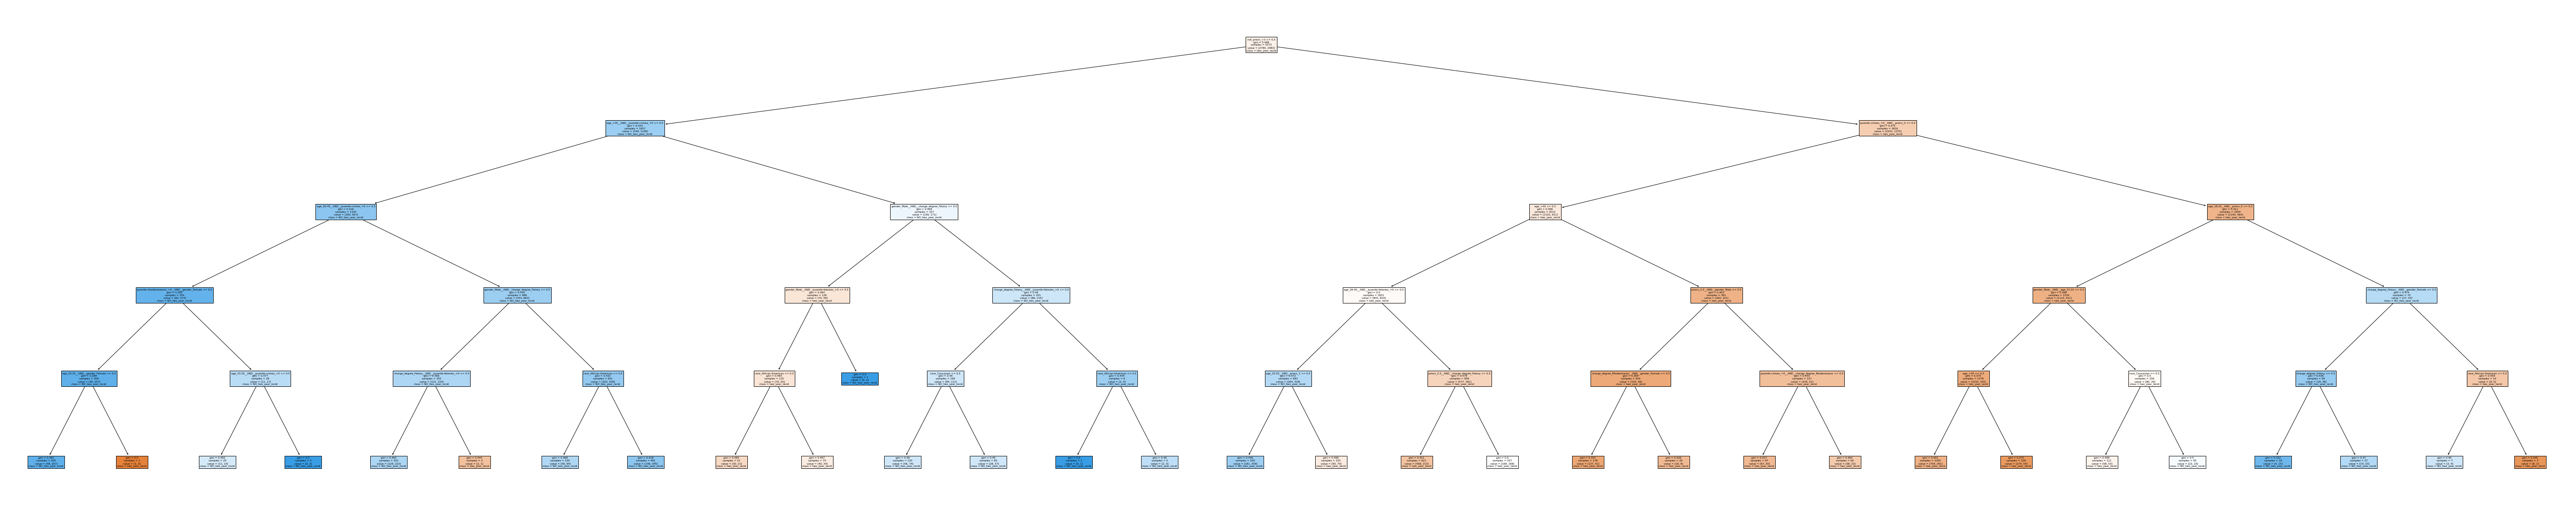

In [26]:
plt.figure(figsize=(100,20))
tree.plot_tree(clf,feature_names= tuple(features),class_names= (prediction, "NO_" + prediction ),filled=True)
plt.show()

In [37]:
params = [["best", 2, 50],
          ["best", 4, 50],
          ["random", 4, 100],
          ["random", 2, 16],
          ["random", 4, 4],
          ["best", 8, 4]]

clf = tree.DecisionTreeClassifier(splitter=params[0][0], max_depth=params[0][1], min_samples_leaf=params[0][2])
clf = clf.fit(train_examples, train_labels)

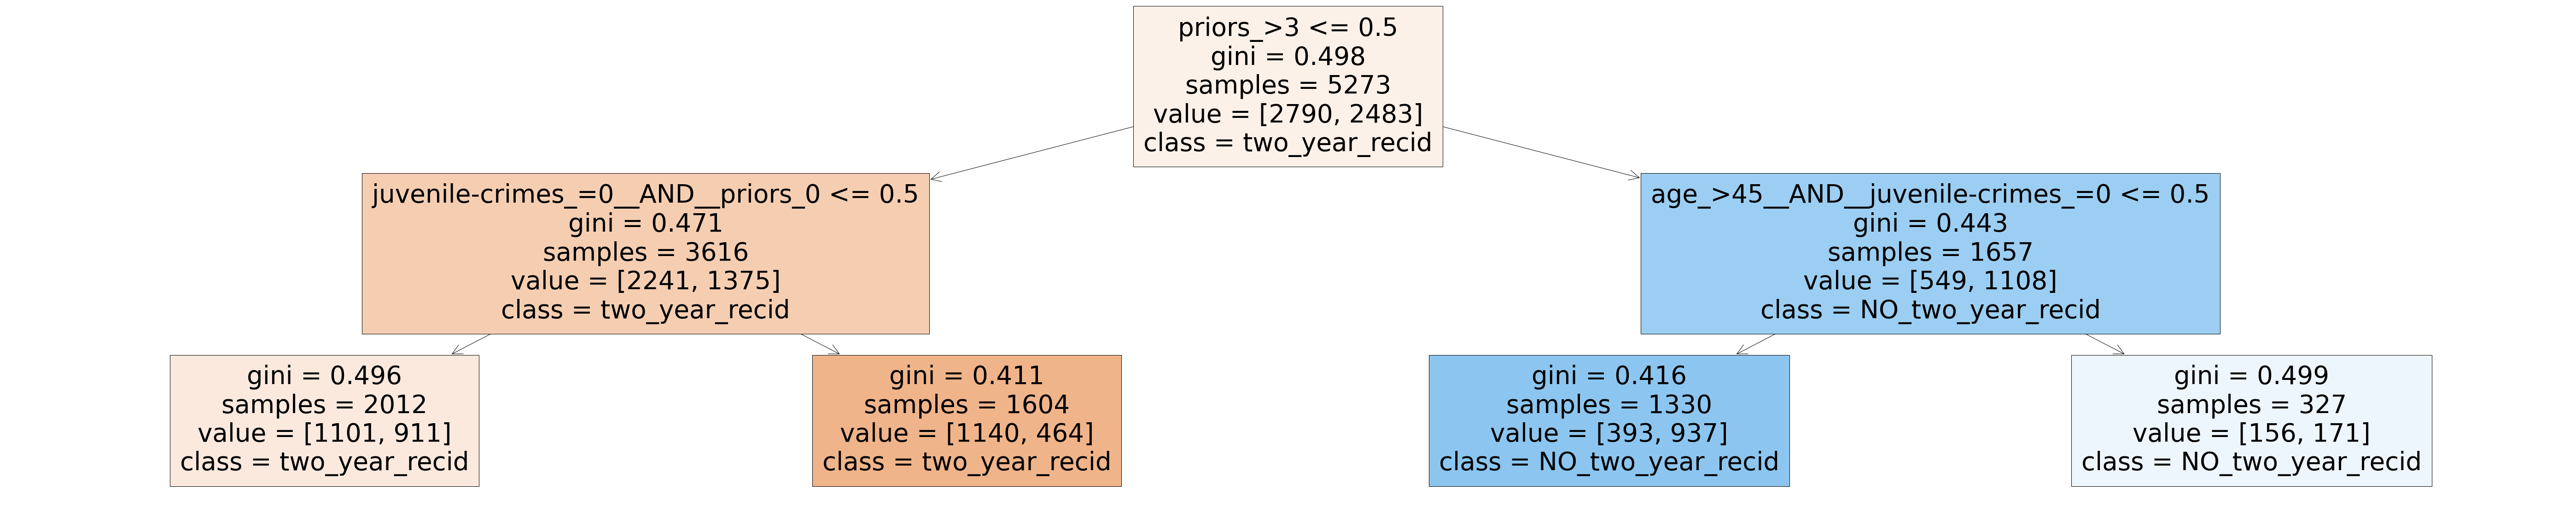

In [38]:
plt.figure(figsize=(100,20))
tree.plot_tree(clf,feature_names= tuple(features),class_names= (prediction, "NO_" + prediction ),filled=True)
plt.show()

In [29]:
(x_train, x_test, y_train, y_test) = model_selection.train_test_split(train_examples, train_labels, test_size=0.2, random_state=44)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

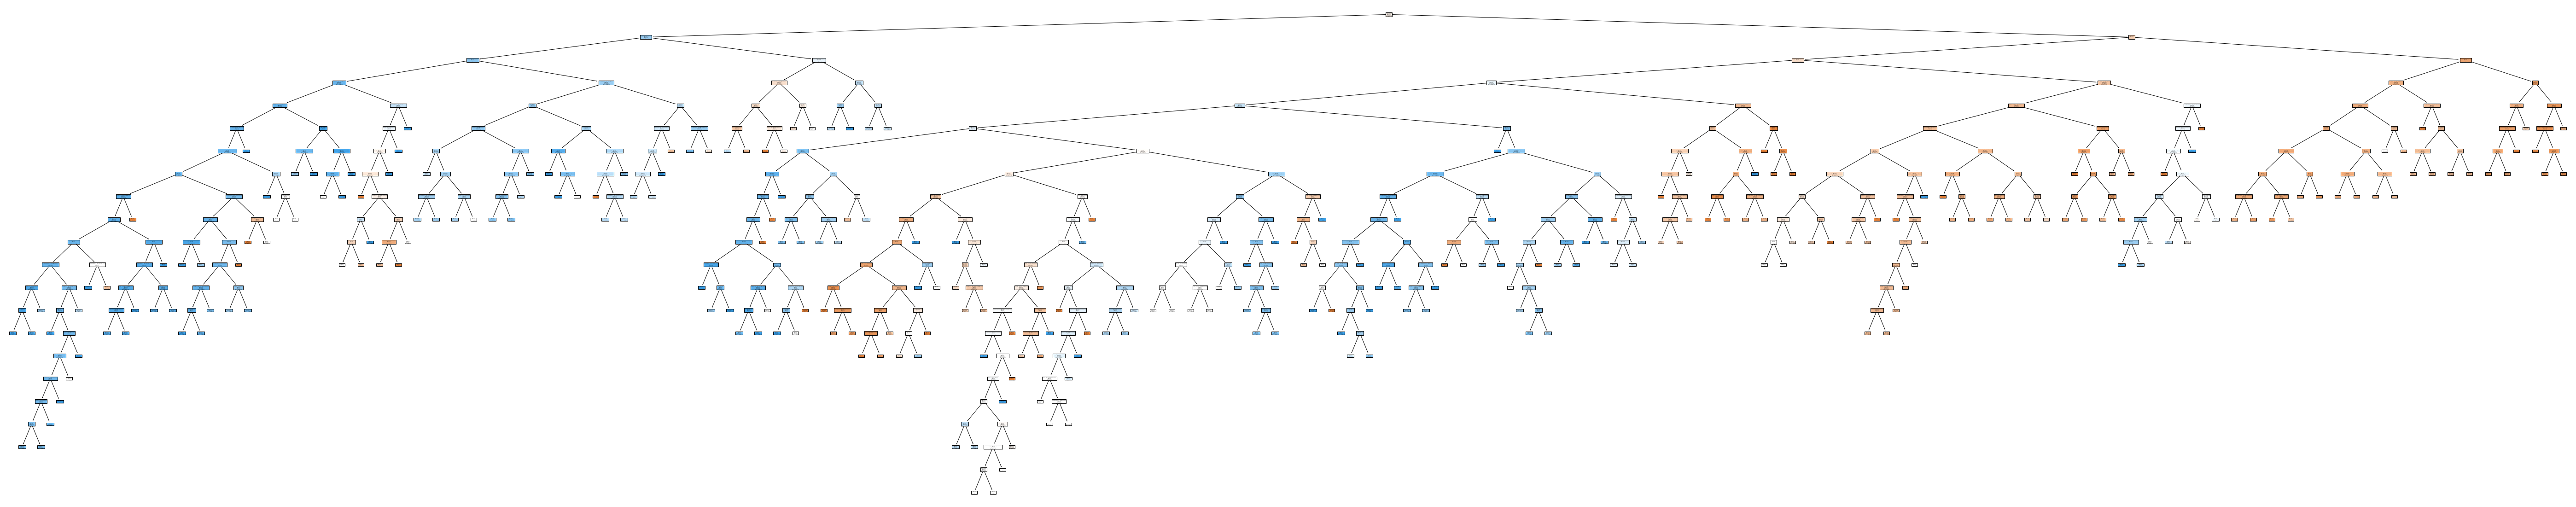

In [42]:
plt.figure(figsize=(100,20))
tree.plot_tree(clf,feature_names= tuple(features),class_names= (prediction, "NO_" + prediction ),filled=True)
plt.show()

In [70]:
(x_train, x_test, y_train, y_test) = model_selection.train_test_split(train_examples, train_labels, test_size=0.2, random_state=75)
clf = tree.DecisionTreeClassifier()
score = model_selection.cross_val_score(clf, x_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.66 accuracy with a standard deviation of 0.02


In [80]:
(x_train, x_test, y_train, y_test) = model_selection.train_test_split(train_examples, train_labels, test_size=0.2, random_state=75)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))
print("TN=%d, FP=%d, FN=%d, TP=%d"%(cm[0][0],cm[0][1],cm[1][0],cm[1][1]))
TNR=float(cm[0][0])/float(cm[0][0]+cm[1][0])
TPR=float(cm[1][1])/float(cm[1][1]+cm[0][1])
print("TPR=%f, TNR=%f"%(TPR,TNR))

TN=401, FP=162, FN=214, TP=278
TPR=0.631818, TNR=0.652033


Il faut séparer les datasets en fonction du groupe éthnique, train le model et mesurer les TPR et TNR et précision pour les différent groupes éthniques.